In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [17]:
import os

DATA_DIR = "/content/gdrive/MyDrive/Colab Notebooks/Deep Learning/Project/CLIP/data/indo_fashion_mini/"
TRAIN_ALL_PATH = os.path.join(DATA_DIR, "train_data - all.csv")
TEST_ALL_PATH = os.path.join(DATA_DIR, "test_data - all.csv")
TRAIN_1k_PATH = os.path.join(DATA_DIR, "train.csv")
TEST_1k_PATH = os.path.join(DATA_DIR, "test.csv")

In [18]:
os.path.exists(DATA_DIR)

True

In [3]:
from PIL import Image
import requests

from transformers import CLIPProcessor, VisionTextDualEncoderModel, AutoTokenizer, BertTokenizer
# from indobenchmark import IndoNLGTokenizer

model_pt = VisionTextDualEncoderModel.from_pretrained("Galuh/clip-indonesian", from_flax=True)
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")
processor.tokenizer = AutoTokenizer.from_pretrained("indobenchmark/indobert-large-p2")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/4.49k [00:00<?, ?B/s]

You are using a model of type hybrid-clip to instantiate a model of type vision-text-dual-encoder. This is not supported for all configurations of models and can yield errors.


flax_model.msgpack:   0%|          | 0.00/1.69G [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/modeling_flax_pytorch_utils.py:460: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at ../torch/csrc/utils/tensor_numpy.cpp:206.)
  pt_model_dict[flax_key] = torch.from_numpy(flax_tensor)
All Flax model weights were used when initializing VisionTextDualEncoderModel.

All the weights of VisionTextDualEncoderModel were initialized from the Flax model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use VisionTextDualEncoderModel for predictions without further training.


preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/862k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.19k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.53k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/229k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

In [5]:
import pandas as pd

In [62]:
train_all_df = pd.read_csv(TRAIN_ALL_PATH)
test_all_df = pd.read_csv(TEST_ALL_PATH)

train_1k_df = pd.read_csv(TRAIN_1k_PATH)
test_1k_df = pd.read_csv(TEST_1k_PATH)

In [63]:
labels_dict = {'wanita_mojaris': 'wanita mojaris',
 'pria_kurta': 'pria kurta',
 'blus': 'blus',
 'rok_dalam': 'rok',
 'lehenga': 'lehenga',
  'jaket_nehru': 'jaket nehru',
 'celana_dhoti': 'celana dhoti',
 'palazzo': 'palazzo',
 'sari': 'sari',
 'dupatta': 'dupatta',
 'pria_mojaris': 'pria mojaris',
 'sherwani': 'sherwani',
 'gaun': 'gaun',
 'legging_dan_salwar': 'legging dan salwar',
 'wanita_kurta': 'wanita kurta'}

labels = list(labels_dict.values())

In [64]:
train_all_df["ID_class_label"] = train_all_df["ID_class_label"].apply(lambda x: labels_dict[x] if pd.notna(x) else x).tolist()
test_all_df["ID_class_label"] = test_all_df["ID_class_label"].apply(lambda x: labels_dict[x] if pd.notna(x) else x).tolist()
train_1k_df["ID_class_label"] = train_1k_df["ID_class_label"].apply(lambda x: labels_dict[x]).tolist()
test_1k_df["ID_class_label"] = test_1k_df["ID_class_label"].apply(lambda x: labels_dict[x]).tolist()

In [65]:
train_all_df.shape, test_all_df.shape, train_1k_df.shape, test_1k_df.shape

((91166, 8), (7500, 8), (15000, 9), (4500, 3))

In [66]:
train_1k_df.columns

Index(['index', 'image_url', 'image_path', 'brand', 'product_title',
       'ID_product_title', 'class_label', 'ID_class_label', 'color'],
      dtype='object')

### Caption Distribution

Text(0, 0.5, 'Count')

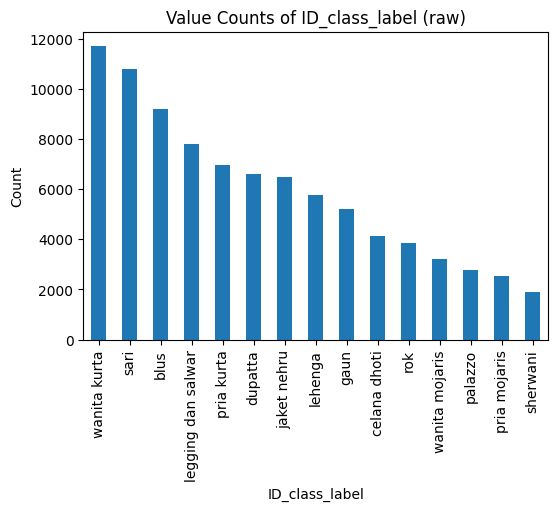

In [67]:
import matplotlib.pyplot as plt

value_counts = train_all_df["ID_class_label"].value_counts()
plt.figure(figsize=(6, 4))  # Adjust the figure size as needed
value_counts.plot(kind='bar')
plt.title('Value Counts of ID_class_label (raw)')
plt.xlabel('ID_class_label')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

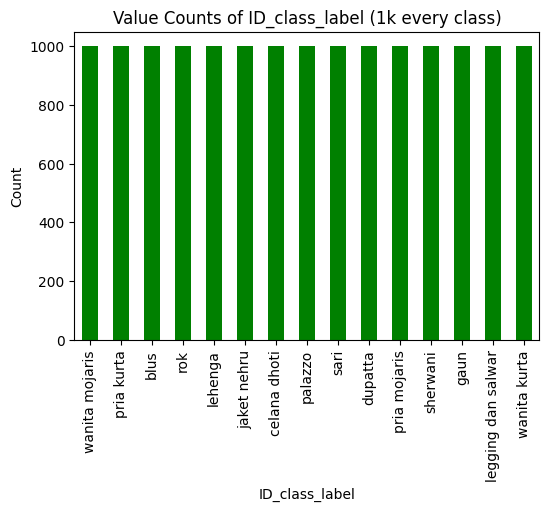

In [68]:
value_counts = train_1k_df["ID_class_label"].value_counts()
plt.figure(figsize=(6, 4))  # Adjust the figure size as needed
value_counts.plot(kind='bar', color="green")
plt.title('Value Counts of ID_class_label (1k every class)')
plt.xlabel('ID_class_label')
plt.ylabel('Count')

In [135]:
str_len = train_1k_df[train_1k_df["ID_product_title"].notna()]["ID_product_title"].str.len()
print("summary &", str_len.min(), "&", str_len.max(), "&", round(str_len.mean(), 2), "&", round(str_len.std(), 2))

summary & 4 & 430 & 56.08 & 33.4


In [134]:
labels = train_1k_df["ID_class_label"].unique().tolist()
for label in labels:
  str_len = train_1k_df[(train_1k_df["ID_product_title"].notna()) & (train_1k_df["ID_class_label"] == label)]["ID_product_title"].str.len()
  print(label, "&", str_len.min(), "&", str_len.max(), "&", round(str_len.mean(), 2), "&", round(str_len.std(), 2), r"\\")

wanita mojaris & 5 & 201 & 66.84 & 41.21 \\
pria kurta & 10 & 246 & 36.67 & 23.46 \\
blus & 9 & 214 & 66.98 & 35.83 \\
rok & 10 & 240 & 68.96 & 39.27 \\
lehenga & 12 & 145 & 47.64 & 19.72 \\
jaket nehru & 10 & 175 & 47.84 & 25.56 \\
celana dhoti & 11 & 203 & 80.82 & 37.86 \\
palazzo & 13 & 174 & 48.02 & 20.44 \\
sari & 4 & 430 & 65.81 & 31.62 \\
dupatta & 7 & 193 & 58.47 & 31.41 \\
pria mojaris & 10 & 198 & 52.81 & 29.35 \\
sherwani & 7 & 195 & 41.18 & 21.46 \\
gaun & 11 & 236 & 69.5 & 38.71 \\
legging dan salwar & 12 & 171 & 40.12 & 26.79 \\
wanita kurta & 11 & 200 & 49.61 & 29.17 \\


In [136]:
labels = test_1k_df["ID_class_label"].unique().tolist()
for label in labels:
  str_len = test_1k_df[(test_1k_df["ID_product_title"].notna()) & (test_1k_df["ID_class_label"] == label)]["ID_product_title"].str.len()
  print(label, "&", str_len.min(), "&", str_len.max(), "&", round(str_len.mean(), 2), "&", round(str_len.std(), 2), r"\\")

lehenga & 26 & 133 & 58.53 & 19.92 \\
rok & 8 & 193 & 62.09 & 32.89 \\
wanita mojaris & 11 & 202 & 56.97 & 35.47 \\
blus & 16 & 185 & 72.75 & 34.79 \\
pria mojaris & 10 & 150 & 50.26 & 27.5 \\
legging dan salwar & 12 & 148 & 48.61 & 26.18 \\
sari & 11 & 174 & 66.62 & 29.09 \\
palazzo & 14 & 163 & 44.17 & 14.69 \\
gaun & 11 & 189 & 61.92 & 35.73 \\
celana dhoti & 14 & 172 & 63.67 & 36.59 \\
sherwani & 10 & 100 & 45.64 & 15.99 \\
jaket nehru & 10 & 143 & 46.06 & 20.52 \\
dupatta & 7 & 221 & 65.78 & 33.1 \\
pria kurta & 10 & 100 & 42.07 & 17.37 \\
wanita kurta & 11 & 153 & 43.45 & 24.35 \\


### Text Encoder Exploration

In [110]:
import torch

In [130]:
sample_text_list = ['kuda satu', 'KUDA dua', 'terdapat . KUDA kuda banyak', 'kuda-KUDA']

In [131]:
MAX_LEN_TEXT = 10
results = processor.tokenizer(sample_text_list, truncation=True, padding=True, max_length=MAX_LEN_TEXT)
tokens = torch.as_tensor(results["input_ids"])
print(tokens.shape)

torch.Size([4, 7])


In [132]:
tokens

tensor([[    2,  6480,   282,     3,     0,     0,     0],
        [    2,  6480,   662,     3,     0,     0,     0],
        [    2,  1134, 30470,  6480,  6480,   271,     3],
        [    2,  6480, 30469,  6480,     3,     0,     0]])

In [133]:
# Convert token IDs back to tokens (strings)
for idx in range(tokens.shape[0]):
  token_strings = processor.tokenizer.convert_ids_to_tokens(tokens[idx])

  # Print the token strings
  print(token_strings)

['[CLS]', 'kuda', 'satu', '[SEP]', '[PAD]', '[PAD]', '[PAD]']
['[CLS]', 'kuda', 'dua', '[SEP]', '[PAD]', '[PAD]', '[PAD]']
['[CLS]', 'terdapat', '.', 'kuda', 'kuda', 'banyak', '[SEP]']
['[CLS]', 'kuda', '-', 'kuda', '[SEP]', '[PAD]', '[PAD]']


In [118]:
results.keys()

dict_keys(['input_ids', 'token_type_ids', 'attention_mask'])

### Image Resolution

In [80]:
# importing the module
import PIL
from PIL import Image
from tqdm import tqdm

In [81]:
image_paths = DATA_DIR + train_1k_df["image_path"]

In [82]:
train_resolutions = {
    "width": [],
    "height": [],
}

pbar = tqdm(total=len(image_paths), desc="Processing items")
for path in image_paths:
  # loading the image
  img = PIL.Image.open(path)

  # fetching the dimensions
  wid, hgt = img.size

  train_resolutions["width"].append(wid)
  train_resolutions["height"].append(hgt)
  # Update the progress bar
  pbar.update(1)

# Close the progress bar
pbar.close()

Processing items: 100%|██████████| 15000/15000 [59:07<00:00,  4.23it/s]


In [83]:
train_resolution = pd.DataFrame(train_resolutions)

In [87]:
print("Width:")
print(train_resolution["width"].min(), train_resolution["width"].max(), round(train_resolution["width"].mean(), 2), round(train_resolution["width"].std(), 2))

print("Height:")
print(train_resolution["height"].min(), train_resolution["height"].max(), round(train_resolution["height"].mean(), 2), round(train_resolution["height"].std(), 2))

Width:
78 540 218.53 93.1
Height:
82 720 318.92 86.74


In [84]:
train_resolution.head()

width  height
0    320     155
1    148     320
2    320     162
3    169     320
4    204     320

In [89]:
image_paths = DATA_DIR + test_1k_df["image_path"]

In [90]:
test_resolutions = {
    "width": [],
    "height": [],
}

pbar = tqdm(total=len(image_paths), desc="Processing items")
for path in image_paths:
  # loading the image
  img = PIL.Image.open(path)

  # fetching the dimensions
  wid, hgt = img.size

  test_resolutions["width"].append(wid)
  test_resolutions["height"].append(hgt)
  # Update the progress bar
  pbar.update(1)

# Close the progress bar
pbar.close()

Processing items: 100%|██████████| 4500/4500 [18:22<00:00,  4.08it/s]


In [91]:
test_resolution = pd.DataFrame(test_resolutions)

In [92]:
print("Width:")
print(test_resolution["width"].min(), test_resolution["width"].max(), round(test_resolution["width"].mean(), 2), round(test_resolution["width"].std(), 2))

print("Height:")
print(test_resolution["height"].min(), test_resolution["height"].max(), round(test_resolution["height"].mean(), 2), round(test_resolution["height"].std(), 2))

Width:
77 540 273.68 145.69
Height:
90 720 384.15 169.67


### Plot Image

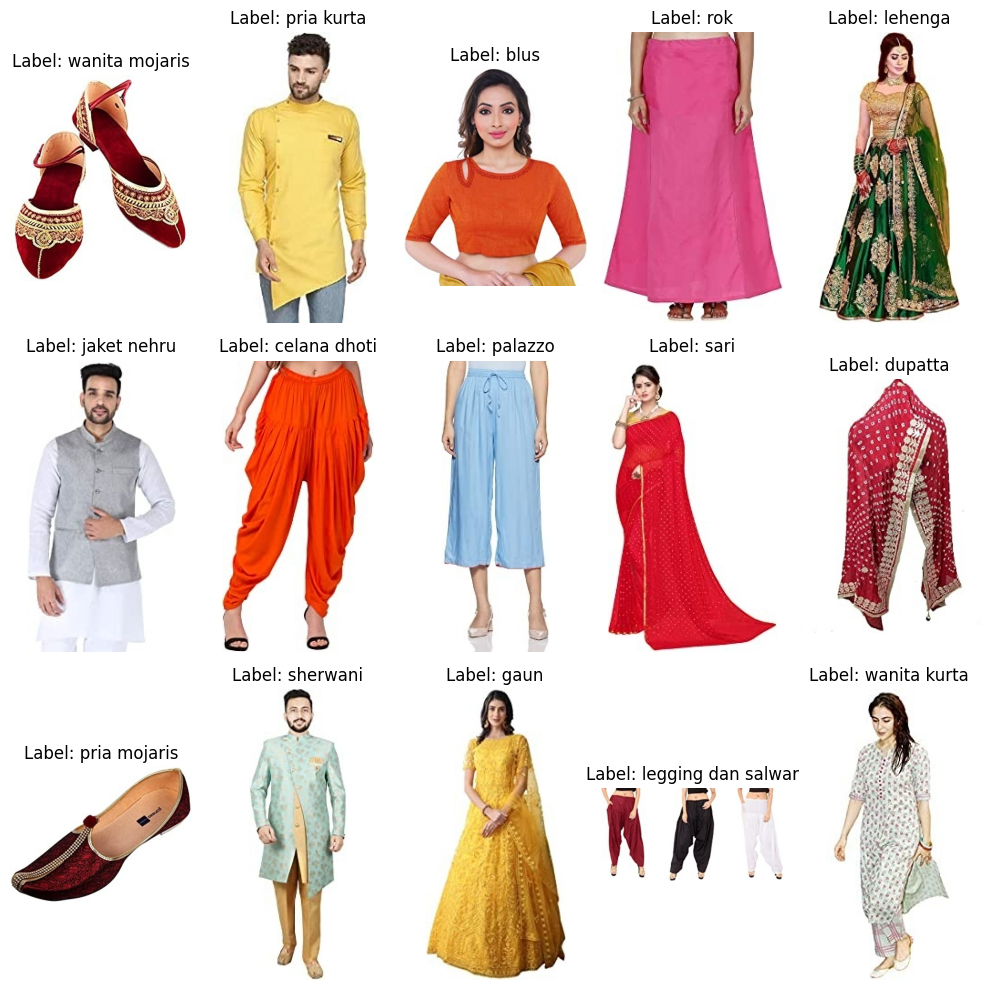

In [106]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming your DataFrame is named df and has columns 'image_data' and 'label'
unique_labels = train_1k_df["ID_class_label"].unique()
num_labels = len(unique_labels)
num_images_per_row = 5
num_rows = (num_labels - 1) // num_images_per_row + 1

fig, axes = plt.subplots(num_rows, num_images_per_row, figsize=(10, 10))

for i, label in enumerate(unique_labels):
    row = i // num_images_per_row
    col = i % num_images_per_row

    # Get the first image for each label
    image_path = train_1k_df[train_1k_df["ID_class_label"] == label]['image_path'].iloc[10]
    image_path = os.path.join(DATA_DIR, image_path)
    image_data = Image.open(image_path)

    # Plot the image
    axes[row, col].imshow(image_data)
    axes[row, col].set_title(f'Label: {label}')
    axes[row, col].axis('off')

# Hide any remaining empty subplots
for i in range(num_labels, num_rows * num_images_per_row):
    row = i // num_images_per_row
    col = i % num_images_per_row
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()